<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [145]:
movies = pd.read_csv('/Users/Shingo_1/Desktop/dat-sg-19/projects/required/project2-eda-options/data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [146]:
# Answer: Check the number of rows.

In [147]:
print(movies.shape)

(979, 6)


In [148]:
# Alternative Answer: Check the number of rows.

In [149]:
print(len(movies))

979


In [150]:
# Alternative Answer: Check the number of columns.

In [151]:
print(len(movies.columns))

6


#### Check the data type of each column.

In [152]:
# Answer:

In [153]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [154]:
# Answer:

In [155]:
duration_mean = movies["duration"].mean()
print(duration_mean)

120.97957099080695


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [156]:
# Answer:

In [157]:
movies_duration = pd.DataFrame(movies.sort_values('duration'))
movies_duration

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


In [158]:
# Shortest
movies_duration.head(1)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


In [159]:
# Longest
movies_duration.tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

In [160]:
# Answer:

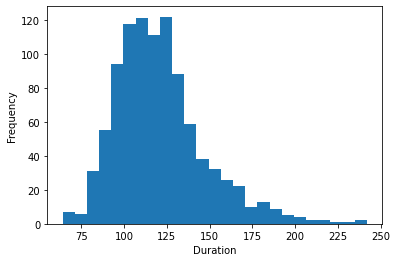

In [161]:
movies.duration.plot(kind='hist', bins=25);
plt.xlabel('Duration');
plt.ylabel('Frequency');

#### Use a box plot to display that same data.

In [162]:
# Answer:

<AxesSubplot:>

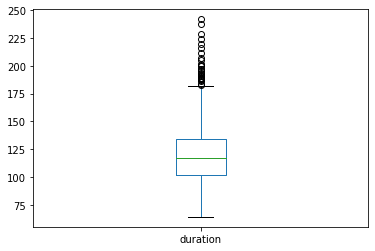

In [163]:
movies.duration.plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [164]:
# Answer:

In [165]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

In [166]:
# Answer:

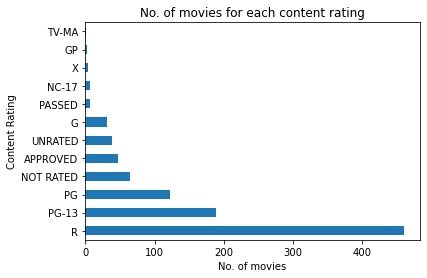

In [167]:
movies.content_rating.value_counts().plot(kind='barh', title='No. of movies for each content rating');
plt.xlabel('No. of movies');
plt.ylabel('Content Rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [168]:
# Answer:

In [169]:
movies_convert1= movies.replace(to_replace=["NOT RATED","APPROVED","PASSED","GP"],value="UNRATED")
movies_convert1.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [170]:
movies_convert2= movies.replace(to_replace=["X","TV-MA"],value="NC-17")
movies_convert2.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17         12
PASSED         7
GP             3
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [171]:
# Answer:

In [172]:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [173]:
# Answer:

In [174]:
movies[movies.content_rating.isna()]
movies.content_rating.fillna('UNRATED', inplace=True)
movies.isna().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [175]:
# Answer:

In [176]:
movies[movies.duration >= 120].star_rating.mean()

7.948898678414082

In [177]:
movies[movies.duration < 120].star_rating.mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

In [178]:
# Answer:

<AxesSubplot:xlabel='duration', ylabel='star_rating'>

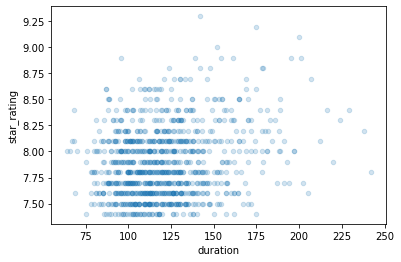

In [179]:
movies.plot(kind='scatter', x='duration', y='star_rating', alpha=0.2)

#### Calculate the average duration for each genre.

In [180]:
# Answer:

In [181]:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

In [182]:
# Answer:

<AxesSubplot:title={'center':'duration'}, xlabel='content_rating'>

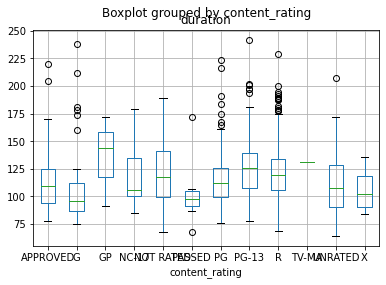

In [183]:
movies.boxplot(column='duration', by='content_rating')

array([[<AxesSubplot:title={'center':'APPROVED'}>,
        <AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'GP'}>],
       [<AxesSubplot:title={'center':'NC-17'}>,
        <AxesSubplot:title={'center':'NOT RATED'}>,
        <AxesSubplot:title={'center':'PASSED'}>],
       [<AxesSubplot:title={'center':'PG'}>,
        <AxesSubplot:title={'center':'PG-13'}>,
        <AxesSubplot:title={'center':'R'}>],
       [<AxesSubplot:title={'center':'TV-MA'}>,
        <AxesSubplot:title={'center':'UNRATED'}>,
        <AxesSubplot:title={'center':'X'}>]], dtype=object)

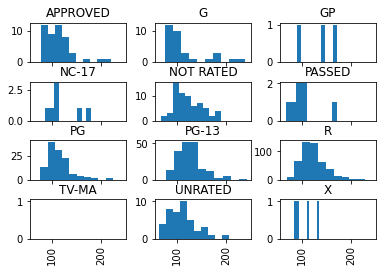

In [184]:
movies.hist(column='duration', by='content_rating', sharex=True)

#### Determine the top rated movie (by star rating) for each genre.

In [185]:
# Answer:

In [186]:
movies.groupby('genre').title.first() 

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                   Life Is Beautiful
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [187]:
# Answer:

In [188]:
dupe_titles = movies[movies.title.duplicated()].title

In [189]:
movies[movies.title.isin(dupe_titles)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [190]:
# Answer:

In [191]:
movies.genre.value_counts()
top_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies[movies.genre.isin(top_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [192]:
# Answer:

In [193]:
genre_counts = movies.genre.value_counts()
top_genres = genre_counts[genre_counts >= 10].index
movies[movies.genre.isin(top_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [194]:
# Answer:

In [195]:
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [196]:
# Answer:

In [205]:
genre_ratings = movies.groupby('genre').star_rating.agg(['count', 'mean'])
genre_ratings[genre_ratings['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

Conclusion: Of all 979 movies, 969 have unique cast listings.
All else, the following franchises have the same cast: Star Wars, Hobbit, Toy SStory 3 and Harry Potter.
Among them, the Harry Potter franchise has the most of any set of actors.

In [ ]:
movies['actors_list'].describe()

In [207]:
dupe_actors = movies[movies.actors_list.duplicated()].actors_list
movies[movies.actors_list.isin(dupe_actors)].head(10)

,star_rating,title,content_rating,genre,duration,actors_list
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
19,8.7,Star Wars,PG,Action,121,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
54,8.5,Back to the Future,PG,Adventure,116,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
80,8.4,Star Wars: Episode VI - Return of the Jedi,PG,Action,134,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
81,8.4,Toy Story 3,G,Animation,103,"[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']"
222,8.1,Harry Potter and the Deathly Hallows: Part 2,PG-13,Adventure,130,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
359,8.0,The Hobbit: The Desolation of Smaug,PG-13,Adventure,161,"[u'Ian McKellen', u'Martin Freeman', u'Richard..."
414,7.9,Toy Story 2,G,Animation,92,"[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']"
520,7.8,Back to the Future Part II,PG,Adventure,108,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
551,7.8,Harry Potter and the Prisoner of Azkaban,PG,Adventure,142,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
